<a href="https://colab.research.google.com/github/arthurfg/BackuPy/blob/main/An%C3%A1lise_de_carteira_Arthur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rentabilidade da carteira x BVSP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [ ]:
carteira1 =['IRBR3.SA','COGN3.SA','POMO4.SA','BBDC4.SA','ITUB4.SA','EMBR3.SA','AZUL4.SA','PETR4.SA','PETR3.SA','VALE3.SA']
carteira_ibov =['IRBR3.SA','COGN3.SA','POMO4.SA','BBDC4.SA','ITUB4.SA','EMBR3.SA','AZUL4.SA','PETR4.SA','PETR3.SA','VALE3.SA',"^BVSP"]
carteira2 = ['PETR4.SA','PETR3.SA','VALE3.SA','^BVSP','USDBRL=X', "NG=F",'S=F', 'CSNA3.SA', 'CL=F']

In [ ]:
carteira = web.get_data_yahoo(carteira1)['Adj Close']
ibov = web.get_data_yahoo('^BVSP')['Adj Close']

In [ ]:
carteira

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA
Date,,,,,,,,,,
2015-06-12,NaN,11.099153,2.302708,11.574893,14.043757,23.323633,NaN,12.078928,13.431639,18.486771
2015-06-15,NaN,11.358728,2.259589,11.529099,14.115689,23.439577,NaN,12.069653,13.450583,17.770367
2015-06-16,NaN,11.367680,2.199216,11.787251,14.614813,23.304312,NaN,12.412909,13.905250,17.254906
2015-06-17,NaN,11.349777,2.242336,11.537440,14.356764,23.236677,NaN,12.190255,13.725277,17.010279
2015-06-18,NaN,11.126004,2.233714,11.970501,14.712086,23.545856,NaN,12.477847,14.018918,17.822788
...,...,...,...,...,...,...,...,...,...,...
2020-06-04,10.45,6.740000,2.990000,21.900000,26.670000,8.930000,19.080000,21.430000,22.160000,55.660000
2020-06-05,10.75,6.900000,2.980000,22.299999,27.260000,9.040000,21.160000,22.100000,22.850000,54.610001
2020-06-08,11.75,6.900000,3.470000,23.469999,28.360001,10.700000,27.350000,22.530001,23.350000,54.779999


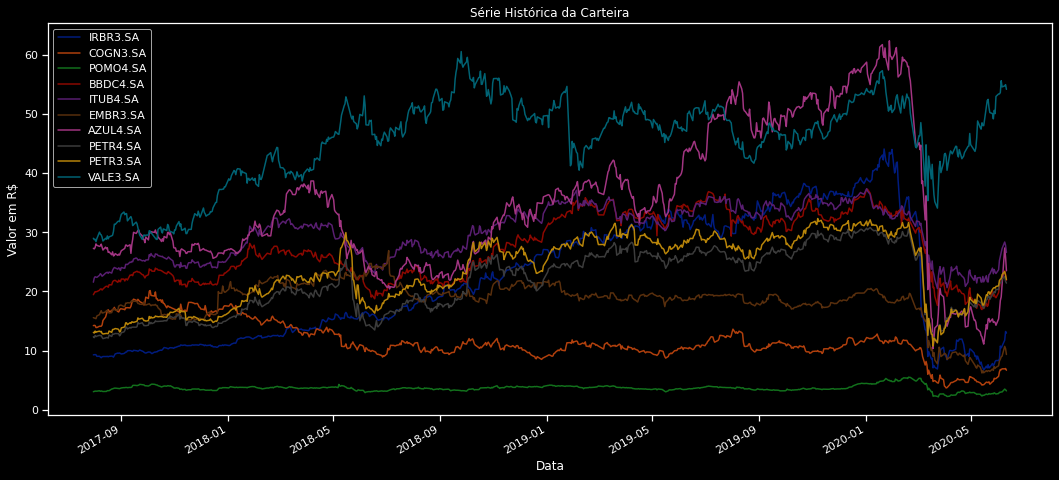

In [ ]:
sns.set(style="ticks")
plt.style.use("dark_background")
sns.set_palette('dark')
carteira.plot(figsize=(18,8))
plt.legend()
plt.ylabel('Valor em R$')
plt.xlabel('Data')
plt.title('Série Histórica da Carteira')
plt.savefig('plot1.png')

In [ ]:
##Normalizando dados da carteira

In [ ]:
carteira.dropna(inplace=True)

In [ ]:
carteira_normalizada = (carteira/carteira.iloc[0])*10000

In [ ]:

carteira_normalizada

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA
Date,,,,,,,,,,
2017-07-31,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2017-08-01,10037.558694,10033.157241,10184.035757,10122.558068,10320.349493,9961.953279,9963.370521,9872.083207,9913.043034,9923.323503
2017-08-02,10054.631577,10013.262762,10337.427133,10260.831400,10427.547254,9917.565132,10043.956353,10165.538833,10166.664904,9939.297938
2017-08-03,10017.072882,9781.166770,10337.427133,10257.551624,10403.421609,9885.859226,10271.062893,10015.050672,10014.491490,9801.917406
2017-08-04,9730.284903,9774.535724,10306.748858,10267.480203,10376.640304,10177.551363,10183.150188,10082.768643,10072.462557,9977.636186
...,...,...,...,...,...,...,...,...,...,...
2020-06-01,8971.079569,3961.771596,8992.865147,10171.770392,10973.535923,4760.633209,5622.710920,16489.025725,16026.997085,18423.793514
2020-06-02,9284.149677,4503.612447,9687.167354,10628.897921,11710.979875,5293.875487,6135.531307,17356.868940,16723.157675,18423.793514
2020-06-03,11605.186582,4771.014512,9687.167354,11101.979046,12021.726703,5473.764906,6758.242227,17413.643499,16876.159153,18506.566661


In [ ]:
sns.set(style="ticks")
plt.style.use("dark_background")
sns.set_palette('dark')

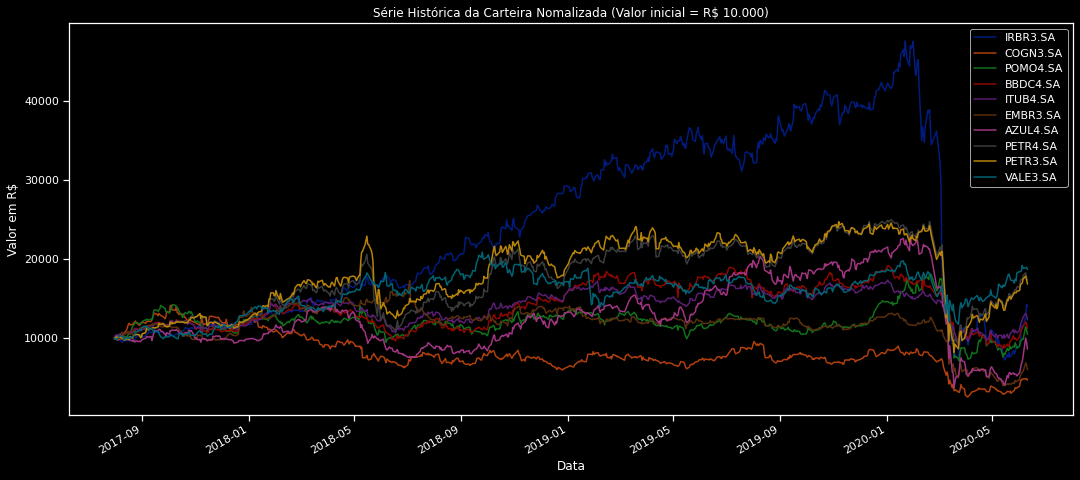

In [ ]:
sns.set(style="ticks")
plt.style.use("dark_background")
sns.set_palette('dark')
carteira_normalizada.plot(figsize=(18,8))
plt.legend()
plt.ylabel('Valor em R$')
plt.xlabel('Data')
plt.title('Série Histórica da Carteira Nomalizada (Valor inicial = R$ 10.000)')
plt.savefig('plot2.png')


In [ ]:
carteira_normalizada['Saldo'] = carteira_normalizada.sum(axis=1)

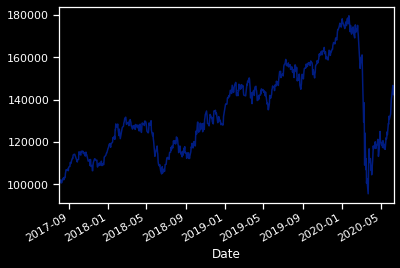

In [ ]:
ibov = ibov[ibov.index>'2017-07-31']
ibov_normalizado = (ibov / ibov.iloc[0])*100000
ibov_normalizado.plot(label= 'IBOV')


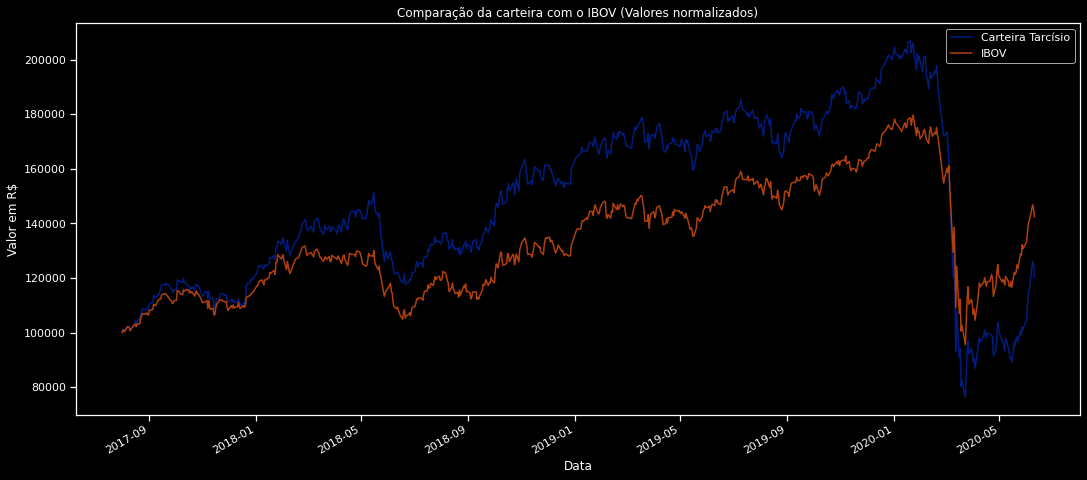

In [ ]:
carteira_normalizada['Saldo'].plot(figsize=(18,8), label='Carteira Tarcísio')
ibov_normalizado.plot(label= 'IBOV')
plt.legend()
plt.ylabel('Valor em R$')
plt.xlabel('Data')
plt.title('Comparação da carteira com o IBOV (Valores normalizados)')
plt.savefig('plot3.png')

In [ ]:
## Correlação

In [ ]:
carteira_corr = web.get_data_yahoo(carteira_ibov)['Adj Close']


In [ ]:
carteira_corr = carteira_corr[['IRBR3.SA','COGN3.SA','POMO4.SA','BBDC4.SA','ITUB4.SA','EMBR3.SA','AZUL4.SA','PETR4.SA','PETR3.SA','VALE3.SA']].rolling(252).corr(carteira_corr['^BVSP'])
carteira_corr.dropna(inplace=True)

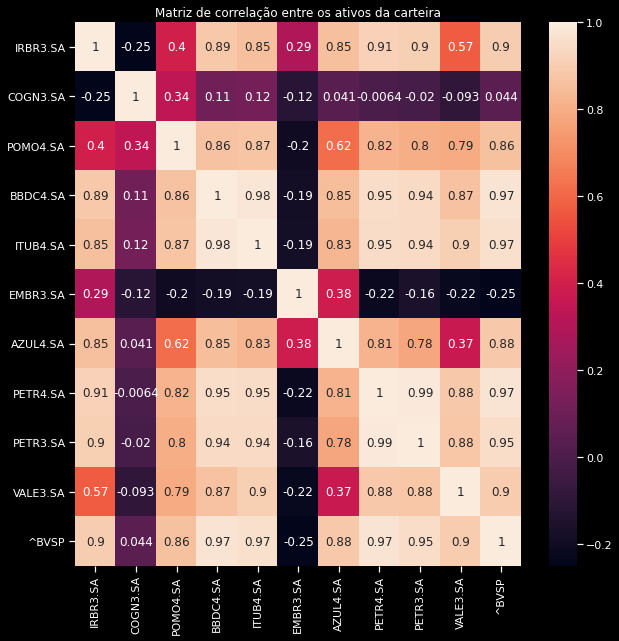

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(carteira_corr.corr(), annot=True, ax=ax)
plt.title("Matriz de correlação entre os ativos da carteira")
plt.xlabel('')
plt.ylabel('')
plt.savefig('plot4.png')

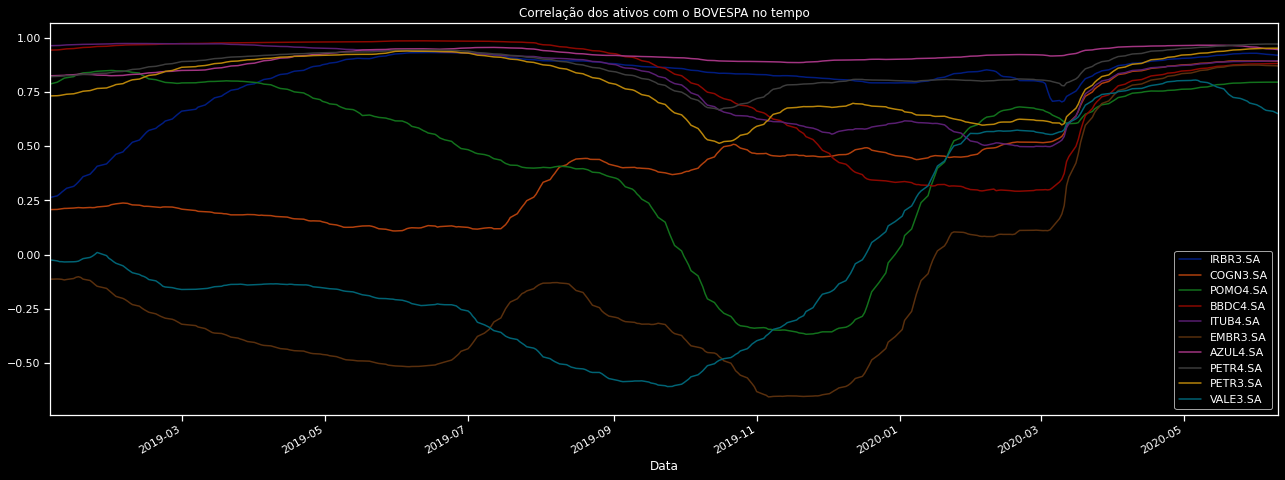

In [ ]:
carteira_corr.plot(figsize=(22,8))
plt.title("Correlação dos ativos com o BOVESPA no tempo")
plt.xlabel('Data')
plt.legend()

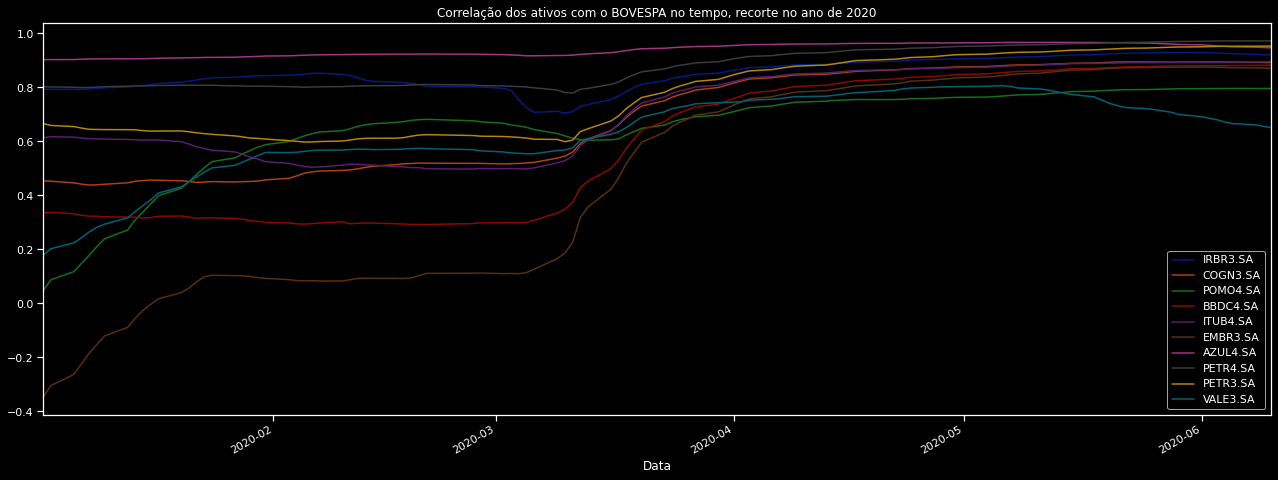

In [ ]:
carteira_corr[carteira_corr.index>'2020-01-01'].plot(figsize=(22,8))
plt.title("Correlação dos ativos com o BOVESPA no tempo, recorte no ano de 2020")
plt.xlabel('Data')
plt.legend()

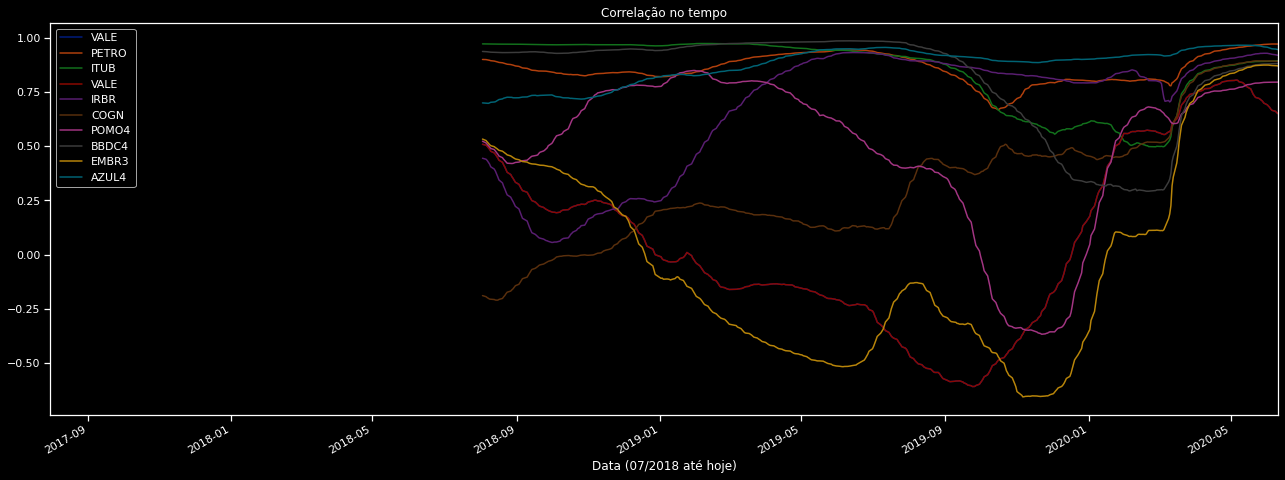

In [ ]:
carteira_corr.dropna(inplace=True)
sns.set(style="ticks")
plt.style.use("dark_background")
sns.set_palette('dark')
carteira_corr['VALE3.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='VALE')
carteira_corr['PETR4.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='PETRO')
carteira_corr['ITUB4.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='ITUB')
carteira_corr['VALE3.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='VALE')
carteira_corr['IRBR3.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='IRBR')
carteira_corr['COGN3.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='COGN')
carteira_corr['POMO4.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='POMO4')
carteira_corr['BBDC4.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='BBDC4')
carteira_corr['EMBR3.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='EMBR3')
carteira_corr['AZUL4.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='AZUL4')
plt.title("Correlação no tempo")
plt.xlabel('Data (07/2018 até hoje)')
plt.legend()
plt.savefig("plot5.png")

In [ ]:
carteira_corr

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,
2017-07-31,9.263100,14.210814,3.024620,19.446983,21.560963,15.565156,27.299999,12.329412,13.071694,28.995113,65920.000000
2017-08-01,9.297891,14.257934,3.080284,19.685322,22.251667,15.505936,27.200001,12.171699,12.958027,28.772789,66516.000000
2017-08-02,9.313705,14.229662,3.126679,19.954222,22.482796,15.436845,27.420000,12.533512,13.289554,28.819107,67136.000000
2017-08-03,9.278914,13.899835,3.126679,19.947844,22.430779,15.387494,28.040001,12.347969,13.090637,28.420771,66777.000000
2017-08-04,9.013260,13.890411,3.117400,19.967152,22.373035,15.841517,27.799999,12.431461,13.166415,28.930269,66898.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-04,10.450000,6.740000,2.990000,21.900000,26.670000,8.930000,19.080000,21.430000,22.160000,55.660000,93829.000000
2020-06-05,10.750000,6.900000,2.980000,22.299999,27.260000,9.040000,21.160000,22.100000,22.850000,54.610001,94637.000000
2020-06-08,11.750000,6.900000,3.470000,23.469999,28.360001,10.700000,27.350000,22.530001,23.350000,54.779999,97645.000000


In [ ]:
## Análise de portifólio 
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dados = web.get_data_yahoo(carteira_ibov)['Adj Close']


In [ ]:
dados.dropna(inplace= True)

In [ ]:
retorno = dados.pct_change()

In [ ]:
retorno

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,
2017-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,0.003756,0.003316,0.018404,0.012256,0.032035,-0.003805,-0.003663,-0.012792,-0.008696,-0.007668,0.009041
2017-08-02,0.001701,-0.001983,0.015062,0.013660,0.010387,-0.004456,0.008088,0.029726,0.025585,0.001610,0.009321
2017-08-03,-0.003735,-0.023179,0.000000,-0.000320,-0.002314,-0.003197,0.022611,-0.014804,-0.014968,-0.013822,-0.005347
2017-08-04,-0.028630,-0.000678,-0.002968,0.000968,-0.002574,0.029506,-0.008559,0.006762,0.005789,0.017927,0.001812
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,0.001205,0.070342,0.030303,0.044855,0.027579,0.036364,0.074930,-0.000492,0.005278,0.007924,0.013924
2020-06-02,0.034898,0.136767,0.077206,0.044941,0.067202,0.112011,0.091205,0.052632,0.043437,0.000000,0.027375
2020-06-03,0.250000,0.059375,0.000000,0.044509,0.026535,0.033981,0.101493,0.003271,0.009149,0.004493,0.021484


In [ ]:
retorno_acumulado = (1+retorno).cumprod()
retorno_acumulado.iloc[0]= 1
retorno_acumulado

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,
2017-07-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-08-01,1.003756,1.003316,1.018404,1.012256,1.032035,0.996195,0.996337,0.987208,0.991304,0.992332,1.009041
2017-08-02,1.005463,1.001326,1.033743,1.026083,1.042755,0.991757,1.004396,1.016554,1.016666,0.993930,1.018447
2017-08-03,1.001707,0.978117,1.033743,1.025755,1.040342,0.988586,1.027106,1.001505,1.001449,0.980192,1.013001
2017-08-04,0.973028,0.977454,1.030675,1.026748,1.037664,1.017755,1.018315,1.008277,1.007246,0.997764,1.014836
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-04,1.128132,0.474287,0.988554,1.126139,1.236958,0.573717,0.698901,1.738120,1.695266,1.919634,1.423377
2020-06-05,1.160519,0.485546,0.985248,1.146707,1.264322,0.580784,0.775092,1.792462,1.748052,1.883421,1.435634
2020-06-08,1.268474,0.485546,1.147252,1.206871,1.315340,0.687433,1.001832,1.827338,1.786303,1.889284,1.481265


In [ ]:
carteira_ = 10000 * retorno_acumulado.iloc[:,:10]
carteira_['Saldo'] = carteira_.sum(axis=1)
carteira_["Retorno"] = carteira_['Saldo'].pct_change()
carteira_

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,Saldo,Retorno
Date,,,,,,,,,,,,
2017-07-31,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,100000.000000,NaN
2017-08-01,10037.558694,10033.157241,10184.035757,10122.558068,10320.349493,9961.953279,9963.370521,9872.083207,9913.043034,9923.323503,100331.432798,0.003314
2017-08-02,10054.631577,10013.262762,10337.427133,10260.831400,10427.547254,9917.565132,10043.956353,10165.538833,10166.664904,9939.297938,101326.723285,0.009920
2017-08-03,10017.072882,9781.166770,10337.427133,10257.551624,10403.421609,9885.859226,10271.062893,10015.050672,10014.491490,9801.917406,100785.021707,-0.005346
2017-08-04,9730.284903,9774.535724,10306.748858,10267.480203,10376.640304,10177.551363,10183.150188,10082.768643,10072.462557,9977.636186,100949.258930,0.001630
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-04,11281.320704,4742.866626,9885.539188,11261.386529,12369.577591,5737.173669,6989.011156,17381.201557,16952.660622,19196.338063,115797.075705,0.013848
2020-06-05,11605.186582,4855.457164,9852.477216,11467.073762,12643.220360,5807.844118,7750.915912,17924.617619,17480.519149,18834.208340,118221.520220,0.020937
2020-06-08,12684.738822,4855.457164,11472.515437,12068.709530,13153.401838,6874.328674,10018.315438,18273.377389,17863.025032,18892.838278,126156.707601,0.067121


##Resultados

In [ ]:
!pip install pandas==0.25.3
import pandas as pd

Start date,2017-07-31
End date,2020-06-10
Total months,33
,Backtest
Annual return,6.8%
Cumulative returns,20.2%
Annual volatility,36.4%
Sharpe ratio,0.37
Calmar ratio,0.11
Stability,0.15
Max drawdown,-63.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,63.05,2020-01-20,2020-03-23,NaT,NaN
1,22.21,2018-05-16,2018-06-21,2018-10-08,104
2,11.64,2019-07-10,2019-08-26,2019-10-22,75
3,10.81,2019-03-19,2019-05-16,2019-06-21,69
4,9.14,2017-10-10,2017-11-14,2018-01-02,61


Stress Events,mean,min,max
New Normal,0.05%,-20.00%,15.93%


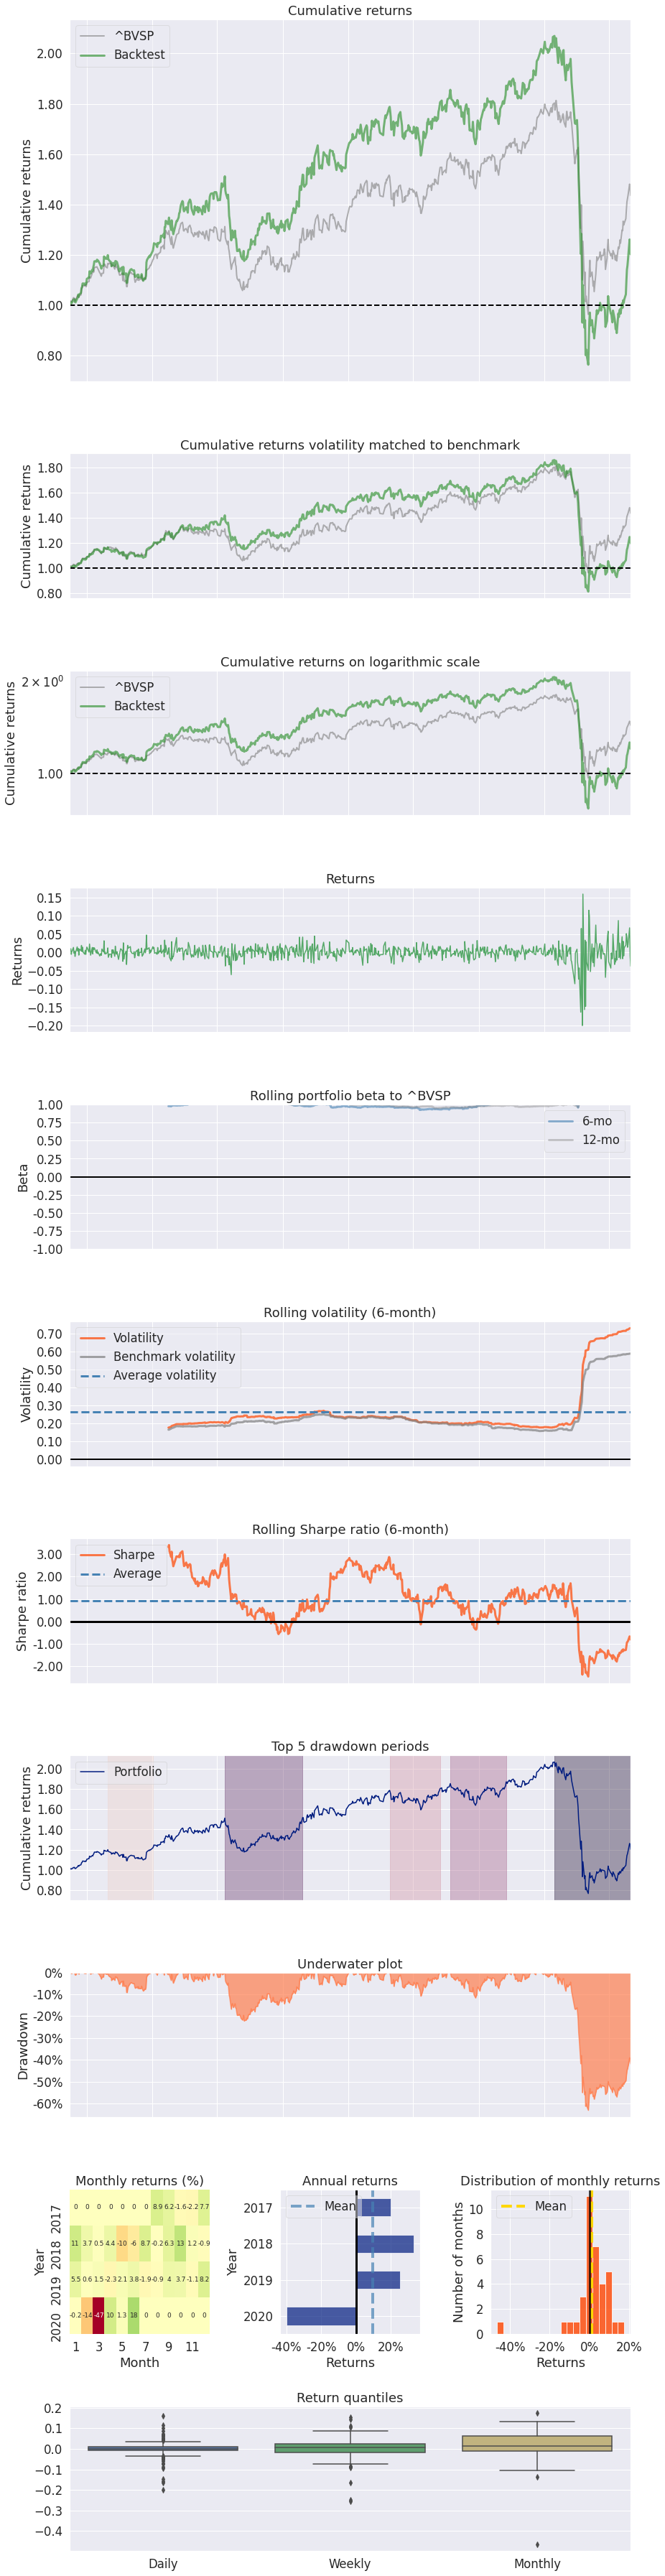

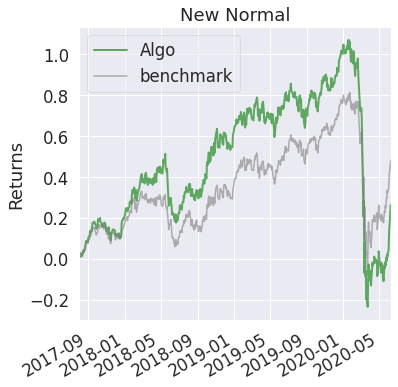

In [ ]:
pf.create_full_tear_sheet(carteira_['Retorno'], benchmark_rets=retorno['^BVSP'])

##Resultados antes do coronavirus

In [ ]:
dados_pre = web.get_data_yahoo(carteira_ibov)['Adj Close']
dados_pre.dropna(inplace=True)

In [ ]:
dados_pre = dados_pre[dados_pre.index < '2020-02-01']

In [ ]:
retorno_pre = dados_pre.pct_change()

In [ ]:
retorno_acumulado_pre = (1+retorno_pre).cumprod()
retorno_acumulado_pre.iloc[0]= 1
retorno_acumulado_pre

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,
2017-07-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-08-01,1.003756,1.003316,1.018404,1.012256,1.032035,0.996195,0.996337,0.987208,0.991304,0.992332,1.009041
2017-08-02,1.005463,1.001326,1.033743,1.026083,1.042755,0.991757,1.004396,1.016554,1.016666,0.993930,1.018447
2017-08-03,1.001707,0.978117,1.033743,1.025755,1.040342,0.988586,1.027106,1.001505,1.001449,0.980192,1.013001
2017-08-04,0.973028,0.977454,1.030675,1.026748,1.037664,1.017755,1.018315,1.008277,1.007246,0.997764,1.014836
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,4.442988,0.793762,1.635069,1.715823,1.527238,1.165424,2.105495,2.273303,2.217403,1.742018,1.736681
2020-01-28,4.698539,0.823317,1.641545,1.717868,1.526783,1.169278,2.286081,2.335751,2.269489,1.765815,1.766975
2020-01-29,4.665668,0.823317,1.592978,1.693327,1.503076,1.167993,2.193040,2.339806,2.259072,1.750295,1.750379


In [ ]:
carteira_pre = 10000 * retorno_acumulado_pre.iloc[:,:10]
carteira_pre['Saldo'] = carteira_pre.sum(axis=1)
carteira_pre["Retorno"] = carteira_pre['Saldo'].pct_change()
carteira_pre

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,Saldo,Retorno
Date,,,,,,,,,,,,
2017-07-31,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,100000.000000,NaN
2017-08-01,10037.558694,10033.157241,10184.035757,10122.558068,10320.349493,9961.953279,9963.370521,9872.083207,9913.043034,9923.323503,100331.432798,0.003314
2017-08-02,10054.631577,10013.262762,10337.427133,10260.831400,10427.547254,9917.565132,10043.956353,10165.538833,10166.664904,9939.297938,101326.723285,0.009920
2017-08-03,10017.072882,9781.166770,10337.427133,10257.551624,10403.421609,9885.859226,10271.062893,10015.050672,10014.491490,9801.917406,100785.021707,-0.005346
2017-08-04,9730.284903,9774.535724,10306.748858,10267.480203,10376.640304,10177.551363,10183.150188,10082.768643,10072.462557,9977.636186,100949.258930,0.001630
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,44429.881240,7937.616631,16350.692281,17158.227587,15272.382170,11654.235531,21054.945476,22733.025142,22174.025556,17420.176177,196185.207791,-0.035343
2020-01-28,46985.392045,8233.166247,16415.447807,17178.679106,15267.828092,11692.784051,22860.806444,23357.512798,22694.890406,17658.148152,202344.655148,0.031396
2020-01-29,46656.675998,8233.166247,15929.783727,16933.268732,15030.761258,11679.934544,21930.403152,23398.064065,22590.717727,17502.949324,199885.724775,-0.012152


Start date,2017-07-31
End date,2020-01-31
Total months,29
,Backtest
Annual return,32.5%
Cumulative returns,99.5%
Annual volatility,21.0%
Sharpe ratio,1.44
Calmar ratio,1.46
Stability,0.90
Max drawdown,-22.2%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.21,2018-05-16,2018-06-21,2018-10-08,104
1,11.64,2019-07-10,2019-08-26,2019-10-22,75
2,10.81,2019-03-19,2019-05-16,2019-06-21,69
3,9.14,2017-10-10,2017-11-14,2018-01-02,61
4,6.34,2018-11-05,2018-12-20,2019-01-02,43


Stress Events,mean,min,max
New Normal,0.12%,-6.10%,4.74%


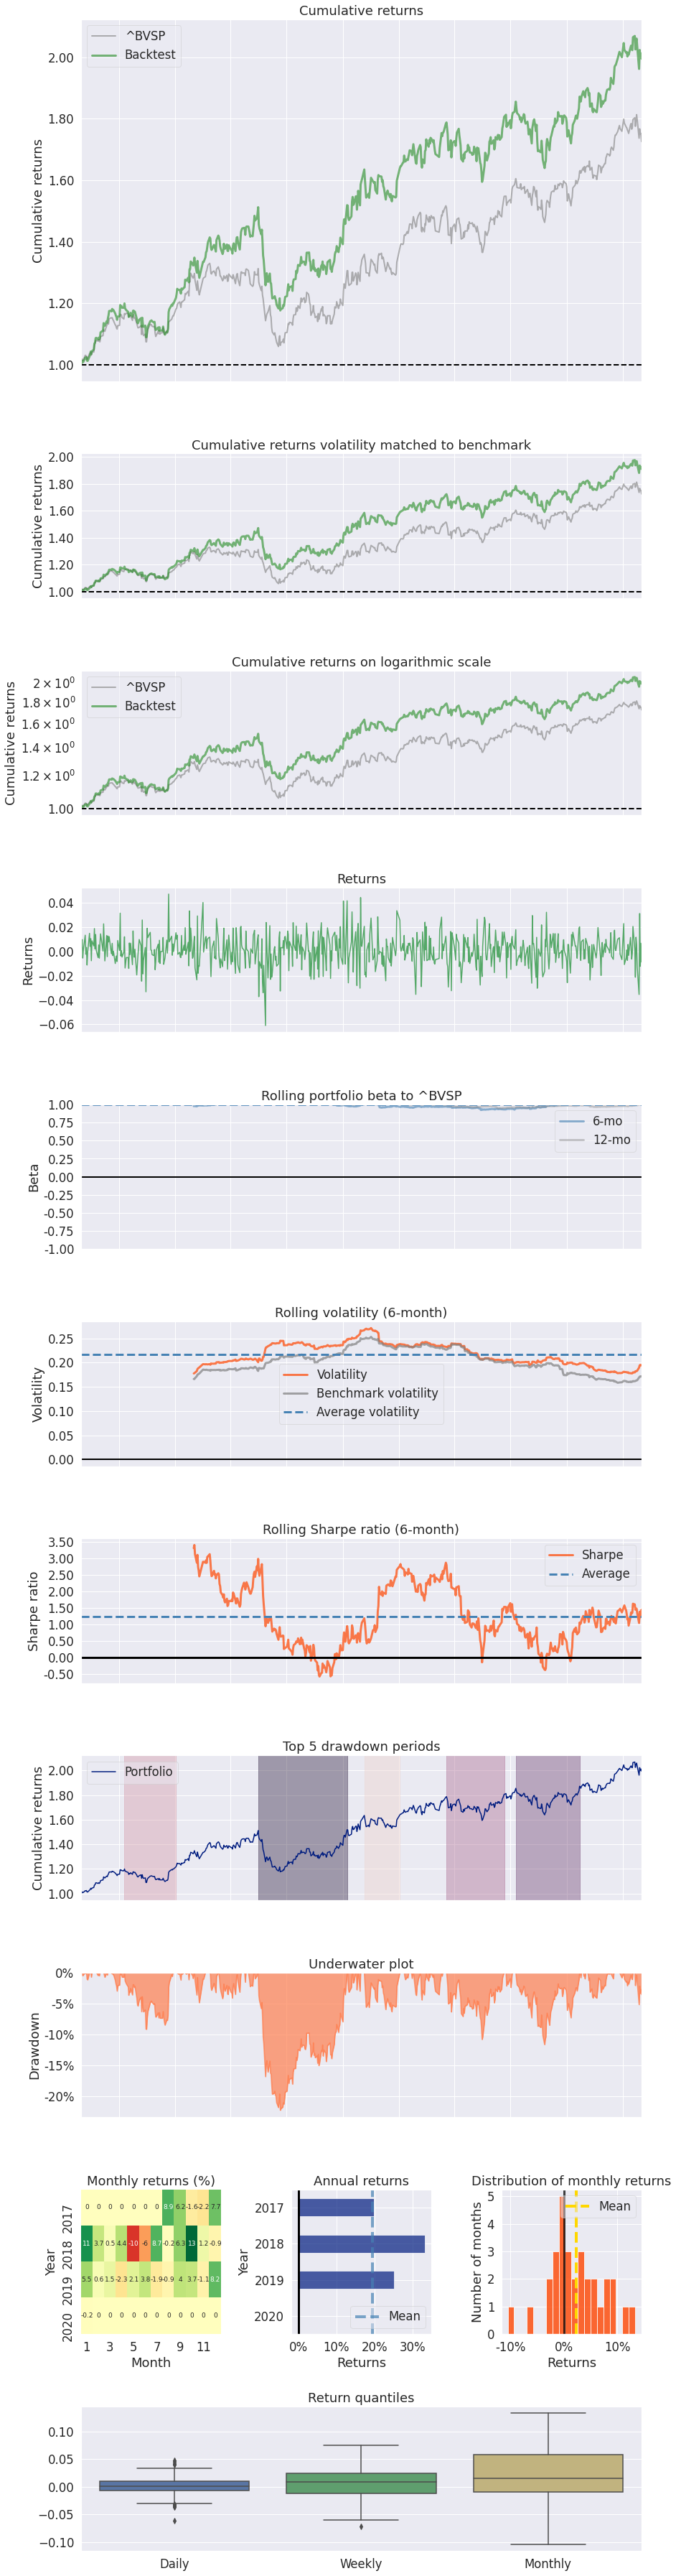

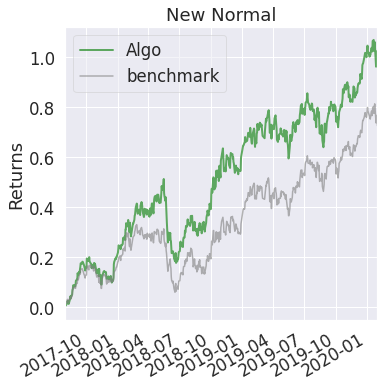

In [ ]:
pf.create_full_tear_sheet(carteira_pre['Retorno'], benchmark_rets=retorno_pre['^BVSP'])

##Carteira 2

In [ ]:
carteira_com = web.get_data_yahoo(carteira2)['Adj Close']

In [ ]:
carteira_com.dropna(inplace=True)

In [ ]:
carteira_com

Symbols,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP,USDBRL=X,NG=F,S=F,CSNA3.SA,CL=F
Date,,,,,,,,,
2015-06-15,12.069653,13.450583,17.770367,53138.0,3.1235,2.889,937.75,5.012214,59.520000
2015-06-16,12.412909,13.905250,17.254906,53702.0,3.0869,2.894,957.50,4.796457,59.970001
2015-06-17,12.190255,13.725277,17.010279,53249.0,3.0504,2.855,969.00,4.721771,59.919998
2015-06-18,12.477847,14.018918,17.822788,54239.0,3.0578,2.777,977.75,4.788158,60.450001
2015-06-22,12.218085,13.782111,17.202486,53864.0,3.0844,2.733,989.50,4.713473,59.680000
...,...,...,...,...,...,...,...,...,...
2020-06-02,21.400000,21.860001,53.419998,91046.0,5.1993,1.779,854.00,10.750000,37.259998
2020-06-03,21.469999,22.059999,53.660000,93002.0,5.0616,1.818,859.25,10.600000,36.910000
2020-06-04,21.430000,22.160000,55.660000,93829.0,5.1172,1.826,868.25,10.490000,37.250000


In [ ]:
carteira_com_normalizada = (carteira_com/carteira_com.iloc[0])*10000

In [ ]:
carteira_com_normalizada

Symbols,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP,USDBRL=X,NG=F,S=F,CSNA3.SA,CL=F
Date,,,,,,,,,
2015-06-15,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2015-06-16,10284.395922,10338.027808,9709.932284,10106.138733,9882.823398,10017.307423,10210.610504,9569.537722,10075.604966
2015-06-17,10099.922187,10204.224942,9572.272210,10020.889006,9765.967384,9882.312494,10333.244468,9420.529609,10067.203916
2015-06-18,10338.199082,10422.536000,10029.499431,10207.196357,9789.658870,9612.322634,10426.552919,9552.980419,10156.250050
2015-06-22,10122.980120,10246.479038,9680.433926,10136.625390,9874.819373,9460.021107,10551.852839,9403.974209,10026.881695
...,...,...,...,...,...,...,...,...,...
2020-06-02,17730.418930,16252.084698,30061.280763,17133.877828,16645.748780,6157.840365,9106.904825,21447.609038,6260.080315
2020-06-03,17788.415376,16400.776293,30196.338009,17501.975987,16204.898454,6292.834882,9162.889896,21148.340835,6201.276808
2020-06-04,17755.275227,16475.122799,31321.807189,17657.608491,16382.902896,6320.526181,9258.864303,20928.875711,6258.400490


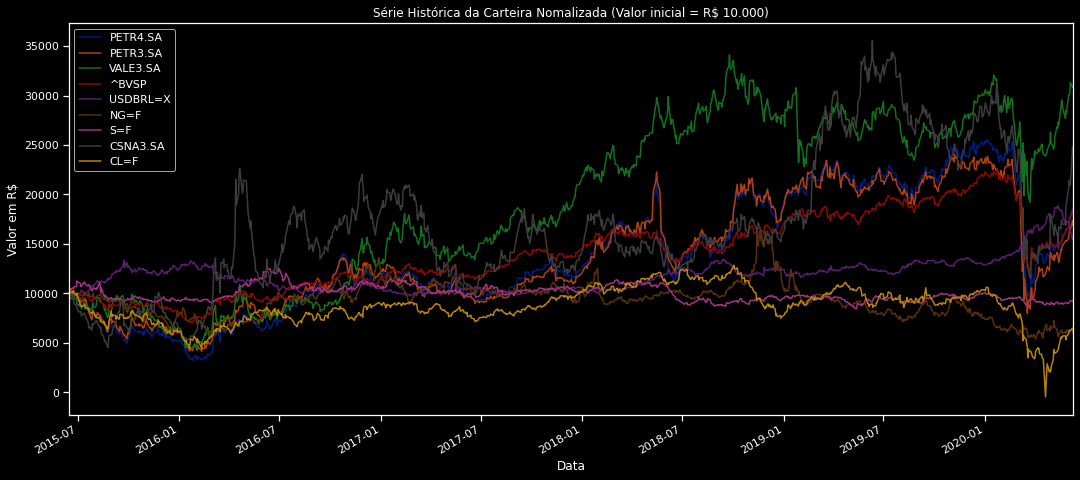

In [ ]:
carteira_com_normalizada.plot(figsize=(18,8))
plt.legend()
plt.ylabel('Valor em R$')
plt.xlabel('Data')
plt.title('Série Histórica da Carteira Nomalizada (Valor inicial = R$ 10.000)')
plt.savefig('plot6.png')


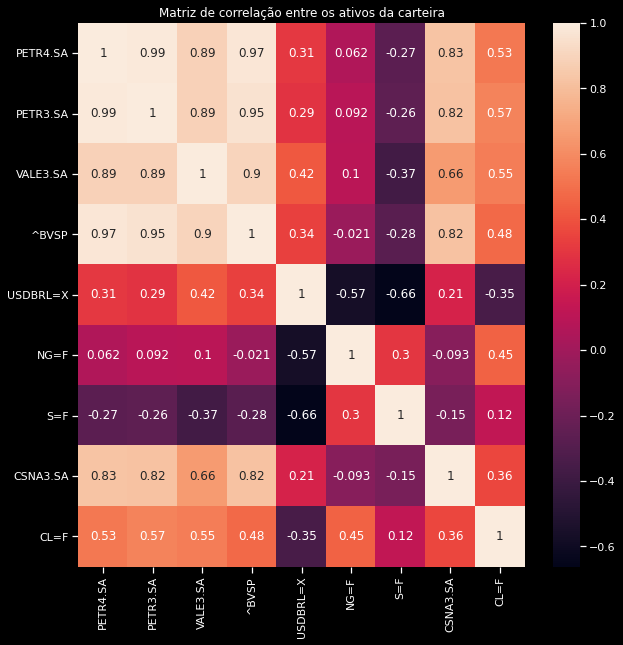

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(carteira_com.corr(), annot=True, ax=ax)
plt.title("Matriz de correlação entre os ativos da carteira")
plt.xlabel('')
plt.ylabel('')
plt.savefig('plot7.png')

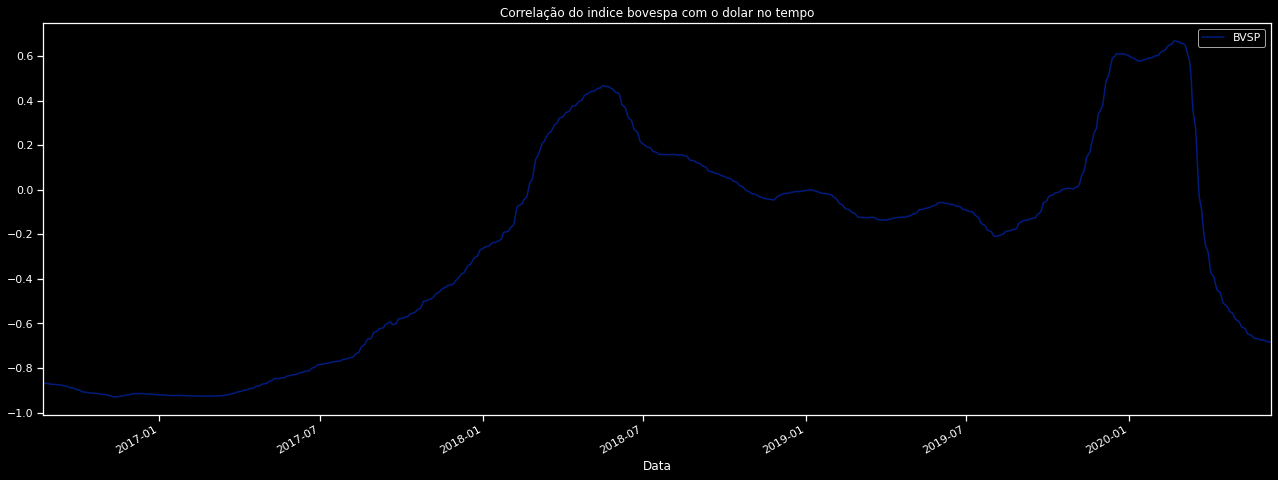

In [ ]:
carteira_com_cor = carteira_com[['^BVSP','PETR4.SA','VALE3.SA'].rolling(252).corr(carteira_com['USDBRL=X'])
carteira_com_cor.dropna(inplace=True)

carteira_com_cor.plot(figsize=(22,8), label='BVSP')
plt.title("Correlação do indice bovespa com o dolar no tempo")
plt.xlabel('Data')
plt.legend()

In [ ]:
carteira_com

Symbols,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP,USDBRL=X,NG=F,S=F,CSNA3.SA,CL=F
Date,,,,,,,,,
2015-06-15,12.069653,13.450583,17.770367,53138.000000,3.1235,2.889,937.75,5.012214,59.520000
2015-06-16,12.412909,13.905250,17.254906,53702.000000,3.0869,2.894,957.50,4.796457,59.970001
2015-06-17,12.190255,13.725277,17.010279,53249.000000,3.0504,2.855,969.00,4.721771,59.919998
2015-06-18,12.477847,14.018918,17.822788,54239.000000,3.0578,2.777,977.75,4.788158,60.450001
2015-06-19,12.199533,13.744224,17.752893,53749.000000,NaN,2.816,971.50,4.730069,59.610001
...,...,...,...,...,...,...,...,...,...
2020-06-04,21.430000,22.160000,55.660000,93829.000000,5.1172,1.826,868.25,10.490000,37.250000
2020-06-05,22.100000,22.850000,54.610001,94637.000000,NaN,1.800,868.25,10.630000,38.970001
2020-06-08,22.530001,23.350000,54.779999,97645.000000,4.8216,1.815,866.50,12.450000,38.590000


In [ ]:
carteira_com_cor = carteira_com[['PETR4.SA','PETR3.SA','VALE3.SA','^BVSP', "NG=F",'S=F', 'CSNA3.SA', 'CL=F']].rolling(252).corr(carteira_com['USDBRL=X'])


In [ ]:
carteira_com_cor.dropna(inplace=True)

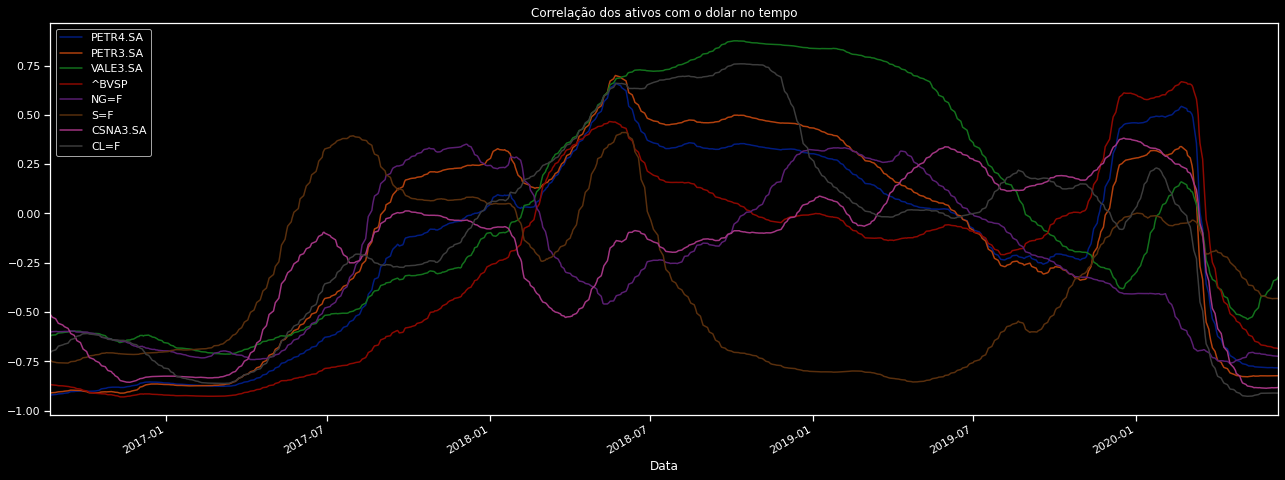

In [ ]:
carteira_com_cor.plot(figsize=(22,8))
plt.title("Correlação dos ativos com o dolar no tempo")
plt.xlabel('Data')
plt.legend()
plt.savefig('plot8.png')

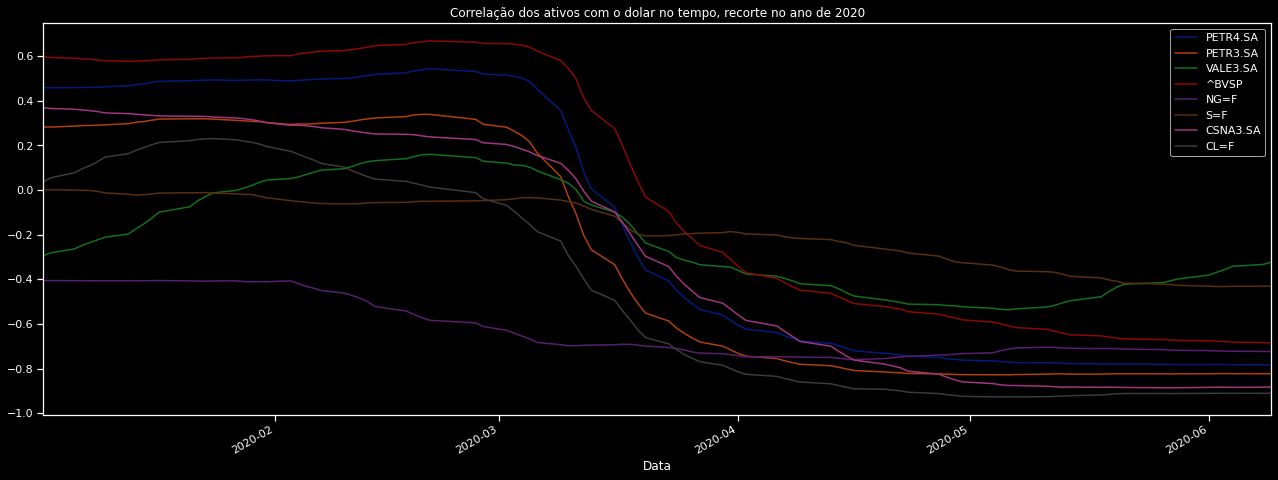

In [ ]:
carteira_com_cor[carteira_com_cor.index>'2020-01-01'].plot(figsize=(22,8))
plt.title("Correlação dos ativos com o dolar no tempo, recorte no ano de 2020")
plt.xlabel('Data')
plt.legend()
plt.savefig('plot9.png')